Decomposing TimeSeries Data

TimeSeriers data is the data in which current data is depending on previous data with respect to time.It can mainly be of two types: Univariate and Multivariate Data. Univariate data has only single time dependent feature whereas multivariate data has multiple time dependent features.

I have done timeseries analysis on Univariate data, where we are using past 'close' prices to predict future 'close' prices.

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading CSV of SPS AAA Stock 
df = pd.read_csv(r"https://raw.githubusercontent.com/shraddha980/Stock_Price_Prediction-S-P/main/AAL_data.csv")

In [4]:
#checking 10 rows of stock data
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [5]:
#checking object type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [6]:
#converting datetime column to datetime type
df.date = pd.to_datetime(df.date)

In [7]:
#Again checking the dtype using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [8]:
#using variable stock_data to store two columns 'date' and 'close'
stock_data = df[['date','close']]

In [9]:
#checking null values in data
stock_data.isnull().sum()

date     0
close    0
dtype: int64

In [10]:
#setting the date column as index in dataset
stock_data = stock_data.set_index("date")

In [11]:
#checking the number of rows and columns in the dataset
stock_data.shape

(1259, 1)

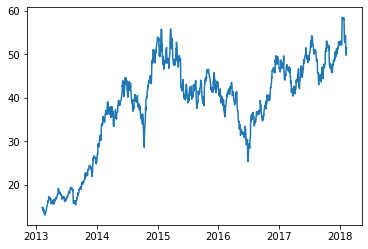

In [12]:
#plotting the values for column close from dataset
plt.plot(stock_data['close'])

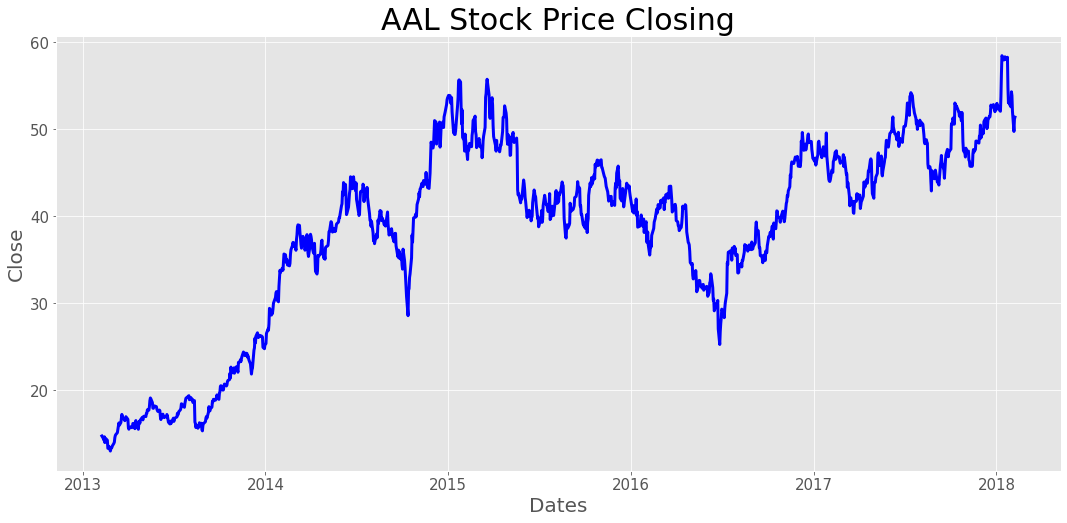

In [13]:
#enhancing the plot with advanced style
plt.style.use('ggplot')
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize = 15)
plt.ylabel('Close', fontsize=20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['close'], linewidth = 3, color = 'blue')
plt.title("AAL Stock Price Closing", fontsize =30)
plt.show()

/tmp/ipykernel_77/4277380551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['close'])


<AxesSubplot: xlabel='close', ylabel='Density'>

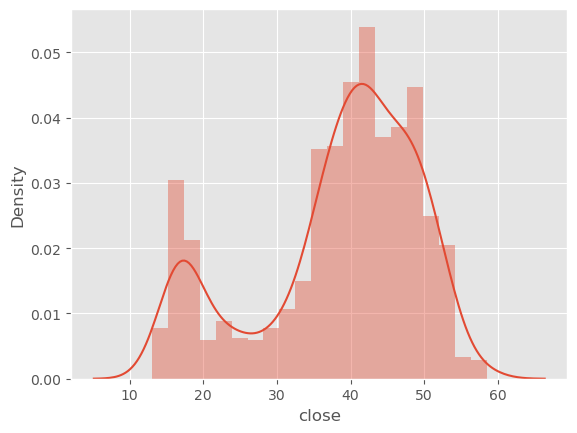

In [77]:
#checking the distribution type
sns.distplot(stock_data['close'])

In [14]:
#checking the type series of stock_data
type(stock_data['close'])

pandas.core.series.Series

In [15]:
#window size we have considered as 12
np.mean(stock_data['close'].head(12))

13.953333333333333

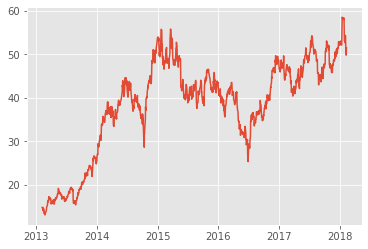

In [16]:
#plotting data without applying themoving average over window 12
plt.plot(stock_data['close'])

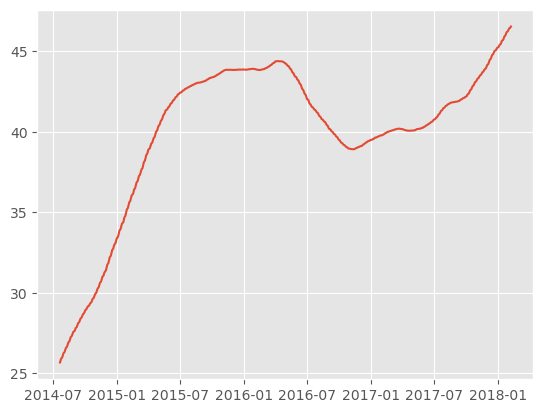

In [81]:
#smothening the data over window 12. It is called a simple moving average.In cumulative moving average we consider 
#the 1st two data then the next 1,2 & 3 data and so on. We do this for visualization and to check 
#if mean is constant or not over a period of time. 

# Here we have taken 365 as window for the simple moving average
plt.plot(stock_data['close'].rolling(365).mean())

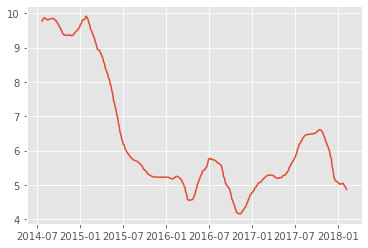

In [17]:
#apply the simple moving average for rolling window of 365 days
plt.plot(stock_data['close'].rolling(365).std())

In [18]:
stock_data

,close
date,
2013-02-08,14.75
2013-02-11,14.46
2013-02-12,14.27
2013-02-13,14.66
2013-02-14,13.99
...,...
2018-02-01,53.88
2018-02-02,52.10
2018-02-05,49.76


In [19]:
#importing AD Fuller Test
from statsmodels.tsa.stattools import adfuller

In [21]:
#AD fuller Test is used to check if the timeseries data is stationary or not.
#A test statistic is computed and a p-value is reported
#Here is uses Null Hypothesis.Null Hypothesis assumes the presence of the unit root
#Null Hypothesis states the value of alpha as 1. So p value should be less than 0.05 inorder to reject the
#null hypothesis

In [22]:
#It returns the adf value test statsitc, pvalue, the number of values used for adf regression and calculation,
#Critical values based on 1%, 5% and 10%
adfuller(stock_data['close'],autolag = 'AIC')

(-2.0666747427852257,
 0.25812419970643474,
 1,
 1257,
 {'1%': -3.4355629707955395,
  '5%': -2.863842063387667,
  '10%': -2.567995644141416},
 3164.664272817721)

In [23]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


In [24]:
stock_data['close'] = pd.to_numeric(stock_data['close'], errors='coerce')

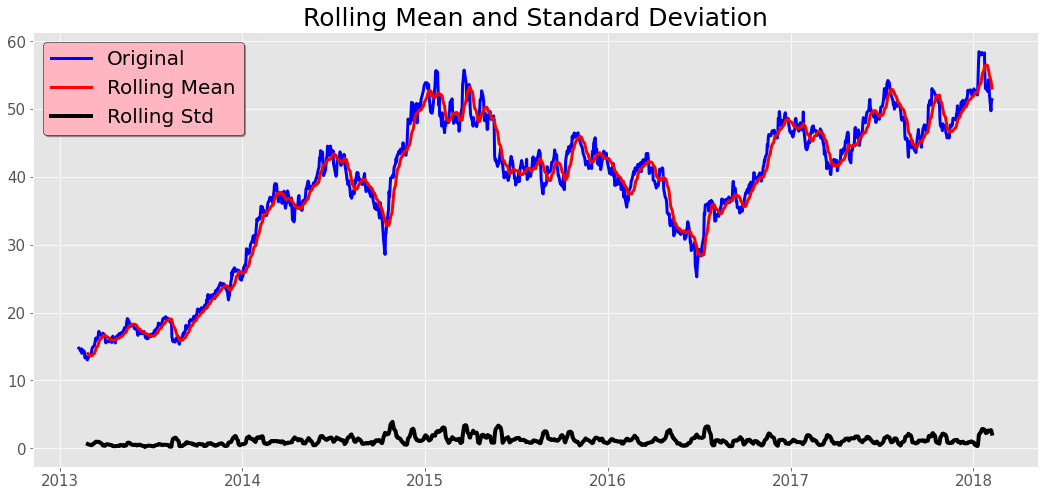

Results of dickey fuller test
Test Statistics                  -2.066675
p-value                           0.258124
No. of lags used                  1.000000
Number of observations used    1257.000000
critical value (1%)              -3.435563
critical value (5%)              -2.863842
critical value (10%)             -2.567996
dtype: float64


In [25]:
#Plotting the Original, Rolling Mean and Standard Deviation
test_stationarity(stock_data['close'])

Analysis

p value is bigger than 0.05, so we cannot reject the Null Hypothesis. Hence the data is non-stationary.
As a result, we need to make the data Non-Stationary.

IMPLEMENTING DIFFERENCING DATA

In [26]:
stock_data.diff(3)

,close
date,
2013-02-08,NaN
2013-02-11,NaN
2013-02-12,NaN
2013-02-13,-0.09
2013-02-14,-0.47
...,...
2018-02-01,1.20
2018-02-02,-0.49
2018-02-05,-4.56


In [27]:
stock_data_dff2 = stock_data.diff(2)

In [28]:
stock_data_dff2 = stock_data_dff2.dropna()

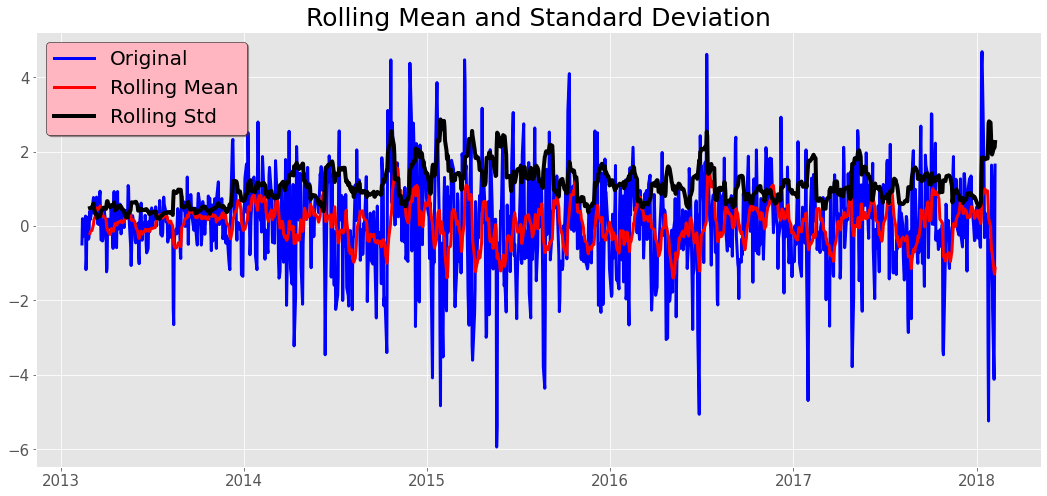

Results of dickey fuller test
Test Statistics               -7.305895e+00
p-value                        1.301857e-10
No. of lags used               2.300000e+01
Number of observations used    1.233000e+03
critical value (1%)           -3.435665e+00
critical value (5%)           -2.863887e+00
critical value (10%)          -2.568020e+00
dtype: float64


In [29]:
test_stationarity(stock_data_dff2)

So after taking Difference as 2, we have converted Non-Stationary Data to Stationary Data using Difference Method. We Subtracted Present Time-Stamp from the Previous Time-stamp.

From the above graph, we can see that Rolling Mean Rolling Std Deviation has constant mean

The p value has become very very less

PLOTTING SEASONALITY, TREND and RESIDUAL in BOTH THE ADDITIVE and MULTIPLICATIVE FORMS

In [30]:
#using the function seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['close'], model = "additive",period=30) 

<Figure size 1296x576 with 0 Axes>

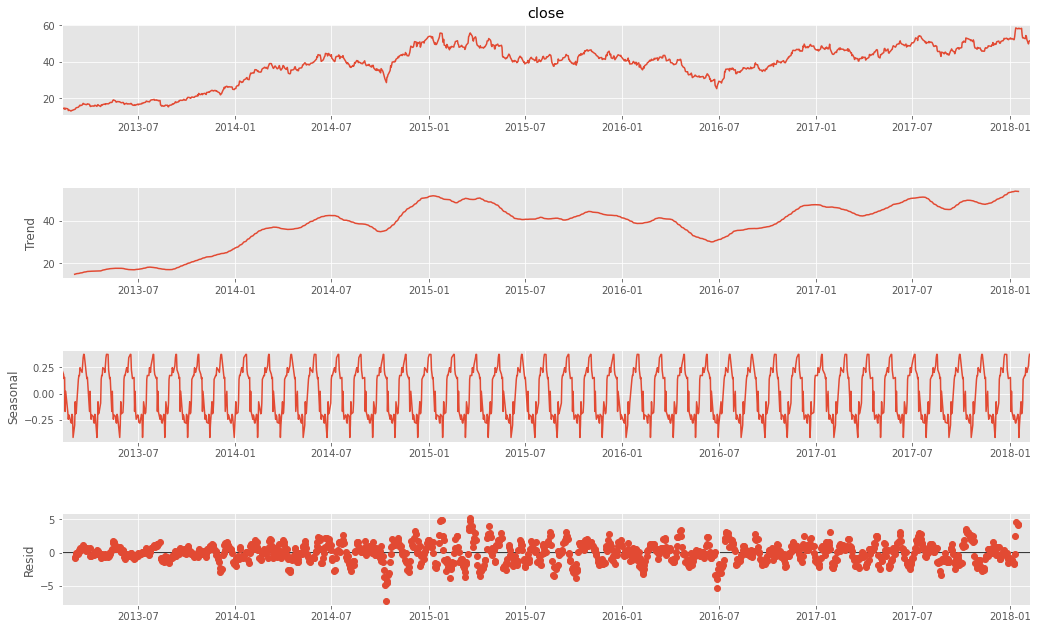

In [31]:
fig = plt.figure(figsize = (18,8))
fig = result.plot()
fig.set_size_inches(17,10)

There is an upward trend in the data /n
It consists of Seasonality /n
The residuals has constant variance

In [35]:
#using the function seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result_multi = seasonal_decompose(stock_data['close'], model = "multiplicative",period=30) 

<Figure size 1296x576 with 0 Axes>

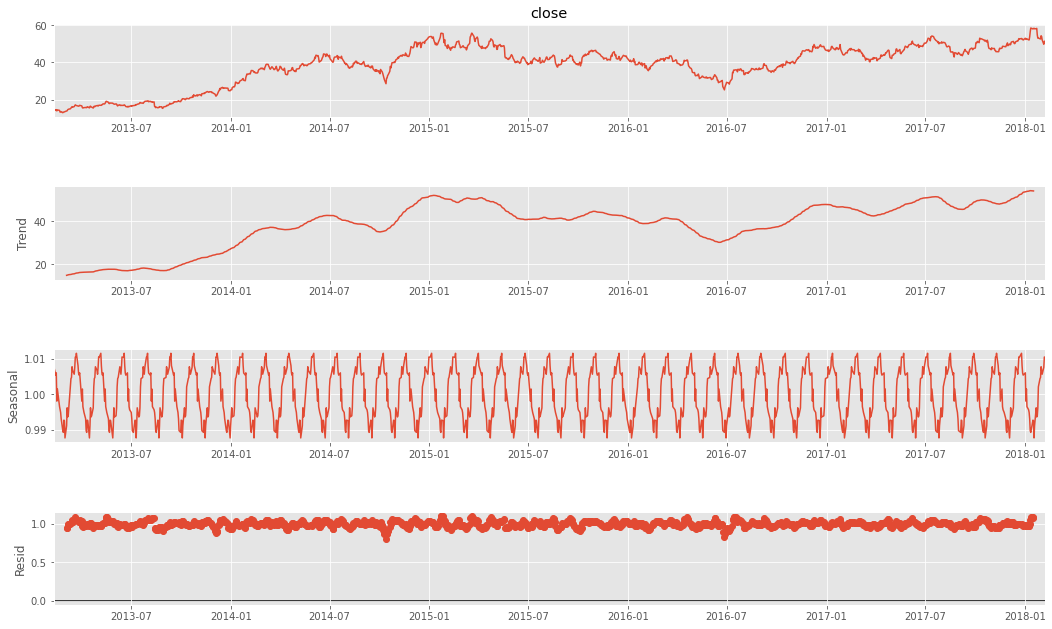

In [36]:
fig = plt.figure(figsize = (18,8))
fig = result_multi.plot()
fig.set_size_inches(17,10)